# **APP RATING PREDICTION**

#### IMPORTING ALL THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### LOADING THE DATASET

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### CHECKING FOR NULL VALUES

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### REMOVING ALL THE NULL VALUES

In [6]:
df.dropna(how='any',inplace=True)

In [7]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### CHANGING THE DATATYPE OF PRICE COLUMN

In [9]:
df.Price.value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$389.99       1
$15.99        1
$3.08         1
$3.88         1
$37.99        1
Name: Price, Length: 73, dtype: int64

In [10]:
df['Price'] = df.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

#### CHANGING THE DATATYPE OF REVIEWS COLUMN

In [11]:
df.Reviews=df.Reviews.astype("int32")

In [12]:
df['Reviews'].describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

#### FORMATTING THE INSTALLS COLUMN

In [13]:
df.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [14]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [15]:
df['Installs']=df.Installs.map(clean_installs)

In [16]:
df.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### FORMATTING THE SIZE COLUMN

In [17]:
def app_size(size):
    if 'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return (x)
    if 'k' in size:
        x=size[:-1]
        x=float(x)
        return (x)
    else:
        return None

In [18]:
df['Size']=df.Size.map(app_size)

In [19]:
df.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [20]:
df.Size.fillna(method='ffill',inplace=True)

In [21]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### SANITY CHECKS

In [22]:
df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [23]:
df=df.drop(df[df.Reviews>df.Installs].index)

In [24]:
len(df[df.Reviews>df.Installs])

0

In [25]:
df=df.drop(df[(df.Type=='Free')&(df.Price>0)].index)

In [26]:
len(df[(df.Type=='Free')&(df.Price>0)])

0

#### PERFORMING UNIVARIATE ANALYSIS

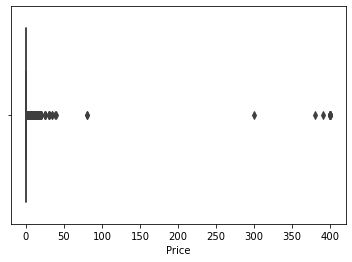

In [27]:
sns.boxplot(x='Price',data=df)
plt.show()

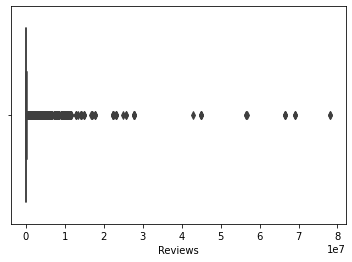

In [28]:
sns.boxplot(x='Reviews',data=df)
plt.show()

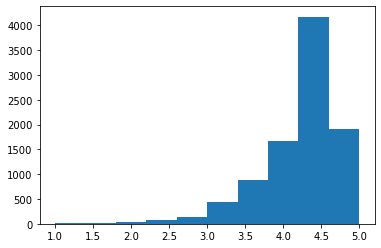

In [29]:
plt.hist('Rating',data=df)
plt.show()

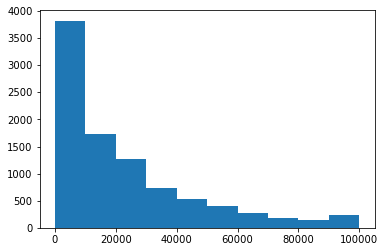

In [30]:
plt.hist('Size',data=df)
plt.show()

#### OUTLIER TREATMENT

In [31]:
df.Price.describe()

count    9353.000000
mean        0.961467
std        15.827539
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [32]:
df=df.drop(df[df.Price>200].index)

In [33]:
len(df[df.Price>200])

0

In [34]:
df=df.drop(df[df.Reviews>2000000].index)

In [35]:
len(df[df.Reviews>2000000])

0

In [36]:
df.Installs.quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [37]:
df=df.drop(df[df.Installs>10000000].index)

In [38]:
len(df[df.Installs>100000000])

0

#### BI-VARIATE ANALYSIS

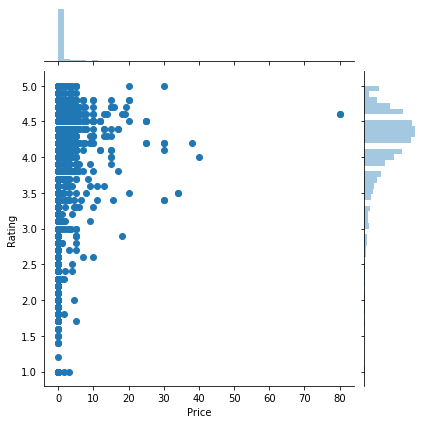

In [39]:
sns.jointplot(x='Price',y='Rating',data=df)
plt.show()

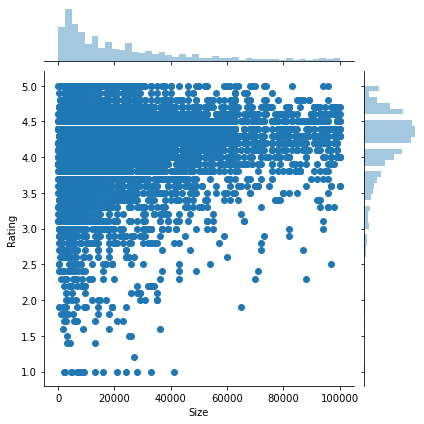

In [40]:
sns.jointplot(x='Size',y='Rating',data=df)
plt.show()

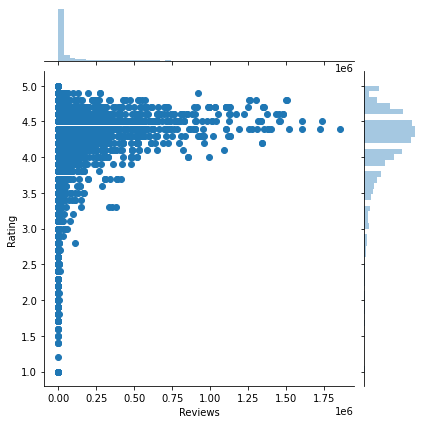

In [41]:
sns.jointplot(x='Reviews',y='Rating',data=df)
plt.show()

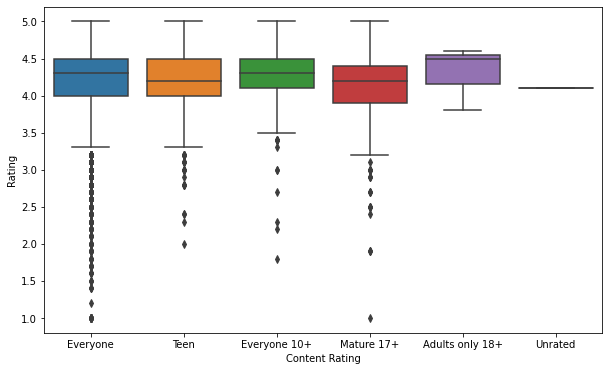

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Content Rating',y='Rating',data=df)
plt.show()

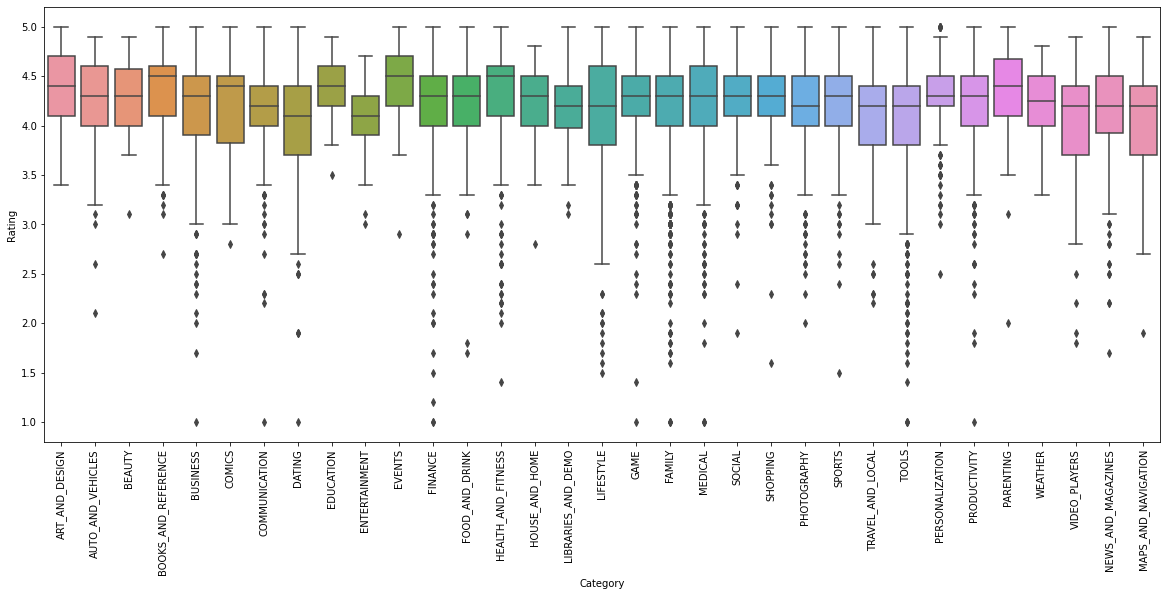

In [43]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Category',y='Rating',data=df)
plt.xticks(rotation=90)
plt.show()

#### DATA PRE-PROCESSING

In [44]:
inp1=df.copy(deep=True)

In [45]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [46]:
inp1['Reviews']=np.log10(inp1['Reviews'])
inp1['Installs']=np.log10(inp1['Installs'])

In [48]:
inp1.drop('App',inplace=True,axis=1)
inp1.drop('Last Updated',inplace=True,axis=1)
inp1.drop('Current Ver',inplace=True,axis=1)
inp1.drop('Android Ver',inplace=True,axis=1)

In [49]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8496 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8496 non-null   object 
 1   Rating          8496 non-null   float64
 2   Reviews         8496 non-null   float64
 3   Size            8496 non-null   float64
 4   Installs        8496 non-null   float64
 5   Type            8496 non-null   object 
 6   Price           8496 non-null   float64
 7   Content Rating  8496 non-null   object 
 8   Genres          8496 non-null   object 
dtypes: float64(5), object(4)
memory usage: 663.8+ KB


In [50]:
inp2=pd.get_dummies(inp1,drop_first=True)

In [51]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

#### TRAIN-TEST SPLIT

In [52]:
import sklearn.model_selection as model_selection

In [54]:
df_train,df_test=model_selection.train_test_split(inp2,train_size=0.70,test_size=0.30,random_state=100)

In [55]:
df_train.shape,df_test.shape

((5947, 157), (2549, 157))

In [56]:
y_train=df_train.pop('Rating')
X_train=df_train

In [57]:
y_test=df_test.pop('Rating')
X_test=df_test

#### LINEAR REGRESSION

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr=LinearRegression()

In [61]:
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
from sklearn.metrics import r2_score

y_train_pred= lr.predict(X_train)

r2_score(y_train, y_train_pred)

0.15782939264321882

In [67]:
y_test_pred= lr.predict(X_test)

r2_score(y_test, y_test_pred)

0.146267961967656